
# Laboratório Machine Learning

### Aprendendo ML do jeito ~~sério~~ certo.  

![Pokemons](pokemons.jpg)

In [15]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### LEITURA DOS DATASETS

In [56]:
pokemon = pd.read_csv('../BatalhaPokemonML/data/pokemon.csv', index_col=0)
combats = pd.read_csv('../BatalhaPokemonML/data/combats.csv')

### É preciso conhecer nosso domínio

1. De quantos pokemons estamos falando
2. Quais os mais fortes
3. Quem vence mais batalhas
4. Quantos pokemons existem por tipo

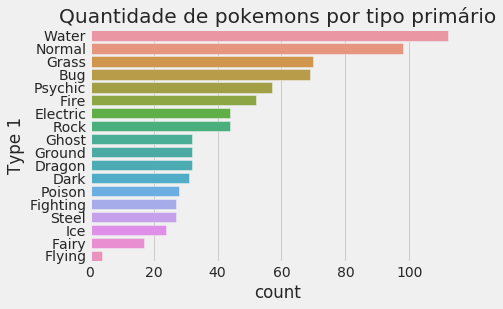

In [52]:
plt.title('Quantidade de pokemons por tipo primário')
sns.countplot(y="Type 1", data=pokemon,order=pokemon['Type 1'].value_counts().index)

In [30]:
combats['first_atk_power'] = combats['First_pokemon'].replace(pokemon['Attack'])\
      + combats['First_pokemon'].replace(pokemon['Sp. Atk'])\
      + combats['First_pokemon'].replace(pokemon['Speed'])

In [53]:
combats.Winner[combats.Winner == combats.First_pokemon] = 1
combats.Winner[combats.Winner == combats.Second_pokemon] = 0

In [57]:
combats

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
5,657,752,657
6,192,134,134
7,73,545,545
8,220,763,763
9,302,31,31


In [47]:
combats.groupby('first_name')['Winner'].sum().sort_values()

first_name
Mega Aerodactyl              1
Weavile                      2
Mega Sceptile                2
Noivern                      2
Greninja                     2
Aerodactyl                   2
Keldeo Resolute Forme        3
Jolteon                      3
Sneasel                      3
Tornadus Therian Forme       3
Raikou                       3
Mega Rayquaza                3
Deoxys Normal Forme          3
Mega Beedrill                3
Mega Absol                   4
Mienshao                     4
Shaymin Sky Forme            4
Purugly                      4
Liepard                      4
Cobalion                     4
Mega Lopunny                 4
Mega Mewtwo X                4
Mega Sharpedo                4
Mega Mewtwo Y                4
Darkrai                      4
Meloetta Pirouette Forme     4
Keldeo Ordinary Forme        5
Mega Manectric               5
Mega Pinsir                  5
Ninjask                      5
                            ..
Druddigon                   

In [46]:
combats['first_name'] = combats['First_pokemon'].replace(pokemon['Name'])

### Uma vez conhecendo nossos dados hora de criar/selecionar features que sejam relevantes para o propósito do modelo.

Index(['Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')